## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "mouse_data.csv"
study_results = "results_data.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
df = df.rename(columns={"Tumor Volume (mm3)": "Tumor_Volume"})
#df.head()

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df = df.rename(columns={"Tumor Volume (mm3)": "Tumor_Volume"})
grouped_regimen = df.groupby(['Drug Regimen'])
avg_tumor = grouped_regimen['Tumor_Volume'].mean()
med_tumor = grouped_regimen['Tumor_Volume'].median()
var_tumor = grouped_regimen['Tumor_Volume'].var()
std_tumor = grouped_regimen['Tumor_Volume'].std()
sem_tumor = grouped_regimen['Tumor_Volume'].sem()

summ_df = pd.DataFrame({ 
    "Average Tumor Volume (mm3)": avg_tumor,
    "Median Tumor Volume (mm3)": med_tumor,
    "Variance of Tumor Volume (mm3)": var_tumor,
    "Standard Deviation Tumor Volume (mm3)": std_tumor,
    "SEM Tumor Volume (mm3)": sem_tumor
})

summ_df



,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

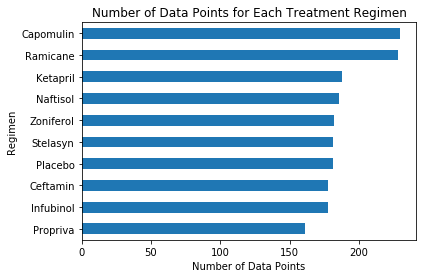

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count_data = df["Drug Regimen"].value_counts()
regimen_count_data = regimen_count_data.sort_values(ascending=True)
regimen_count_data = regimen_count_data.astype(int) 
regimen_count_data.plot(kind="barh")
plt.title("Number of Data Points for Each Treatment Regimen")
plt.xlabel("Number of Data Points")
plt.ylabel("Regimen")
plt.xlim()
plt.show()

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


## Pie plots

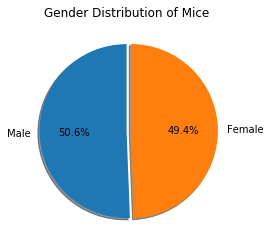

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = df['Sex'].value_counts()
explode = (0, 0.05)
gender_count.plot(kind='pie', explode=explode, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Gender Distribution of Mice')
plt.ylabel("")
plt.show()

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Ramicane, Capomulin, Infubinol, Ceftamin
# outlier_cond = (final_df['Tumor_Volume'] < lower_bound) | (final_df['Tumor_Volume'] > upper_bound)
# outlier_occupancy = final_df.loc[outlier_cond]
cond_time = (df['Timepoint'] == 45)

df_ram = df[(df['Drug Regimen'] == 'Ramicane') & cond_time]
q_ram = df_ram['Tumor_Volume'].quantile([.25,.5,.75])
lq_ram = q_ram[0.25]
uq_ram = q_ram[0.75]
iqr_ram = uq_ram-lq_ram
max_vol_ram = df_ram['Tumor_Volume'].max()
min_vol_ram = df_ram['Tumor_Volume'].min()
lb_ram = lq_ram - (1.5*iqr_ram)
ub_ram = uq_ram + (1.5*iqr_ram)
oc_ram = (df_ram['Tumor_Volume'] < lb_ram) | (df_ram['Tumor_Volume'] > ub_ram)

print(f"Values below {lb_ram} could be outliers for Ramicane.")
print(f"The min volume for Ramicane is: {min_vol_ram}")
print(f"Values above {ub_ram} could be outliers for Ramicane.")
print(f"The max volume for Ramicane is: {max_vol_ram}")



df_Cap = df[(df['Drug Regimen'] == 'Capomulin') & cond_time]
q_Cap = df_Cap['Tumor_Volume'].quantile([.25,.5,.75])
lq_Cap = q_Cap[0.25]
uq_Cap = q_Cap[0.75]
iqr_Cap = uq_Cap-lq_Cap
max_vol_Cap = df_Cap['Tumor_Volume'].max()
min_vol_Cap = df_Cap['Tumor_Volume'].min()
lb_Cap = lq_Cap - (1.5*iqr_Cap)
ub_Cap = uq_Cap + (1.5*iqr_Cap)

print(f"Values below {lb_Cap} could be outliers for Capomulin.")
print(f"The min volume for Capomulin is: {min_vol_Cap}")
print(f"Values above {ub_Cap} could be outliers for Capomulin.")
print(f"The max volume for Capomulin is: {max_vol_Cap}")

df_Inf = df[(df['Drug Regimen'] == 'Infubinol') & cond_time]
q_Inf = df_Inf['Tumor_Volume'].quantile([.25,.5,.75])
lq_Inf = q_Inf[0.25]
uq_Inf = q_Inf[0.75]
iqr_Inf = uq_Inf-lq_Inf
max_vol_Inf = df_Inf['Tumor_Volume'].max()
min_vol_Inf = df_Inf['Tumor_Volume'].min()
lb_Inf = lq_Inf - (1.5*iqr_Inf)
ub_Inf = uq_Inf + (1.5*iqr_Inf)

print(f"Values below {lb_Inf} could be outliers for Infubinol.")
print(f"The min volume for Infubinol is: {min_vol_Inf}")
print(f"Values above {ub_Inf} could be outliers for Infubinol.")
print(f"The max volume for Infubinol is: {max_vol_Inf}")

df_Cef = df[(df['Drug Regimen'] == 'Ceftamin') & cond_time]
q_Cef = df_Cef['Tumor_Volume'].quantile([.25,.5,.75])
lq_Cef = q_Cef[0.25]
uq_Cef = q_Cef[0.75]
iqr_Cef = uq_Cef-lq_Cef
max_vol_Cef = df_Cef['Tumor_Volume'].max()
min_vol_Cef = df_Cef['Tumor_Volume'].min()
lb_Cef = lq_Cef - (1.5*iqr_Cef)
ub_Cef = uq_Cef + (1.5*iqr_Cef)

print(f"Values below {lb_Cef} could be outliers for Ceftamin.")
print(f"The min volume for Ceftamin is: {min_vol_Cef}")
print(f"Values above {ub_Cef} could be outliers for Ceftamin.")
print(f"The max volume for Ceftamin is: {max_vol_Cef}")

Values below 19.690480101250003 could be outliers for Ramicane.
The min volume for Ramicane is: 22.05012627
Values above 49.79900043124999 could be outliers for Ramicane.
The max volume for Ramicane is: 45.22086888
Values below 20.70456164999999 could be outliers for Capomulin.
The min volume for Capomulin is: 23.34359787
Values above 51.83201549 could be outliers for Capomulin.
The max volume for Capomulin is: 47.68596303
Values below 55.35777559500001 could be outliers for Infubinol.
The min volume for Infubinol is: 60.91876652
Values above 75.08224443499999 could be outliers for Infubinol.
The max volume for Infubinol is: 72.2267309
Values below 52.29350701999999 could be outliers for Ceftamin.
The min volume for Ceftamin is: 59.74190064
Values above 76.66786758 could be outliers for Ceftamin.
The max volume for Ceftamin is: 68.92318457


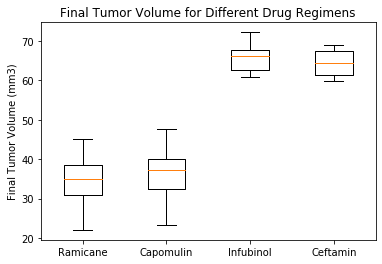

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [df_ram['Tumor_Volume'],df_Cap['Tumor_Volume'],df_Inf['Tumor_Volume'],df_Cef['Tumor_Volume']]
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume for Different Drug Regimens')
ax.boxplot(data, labels=('Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

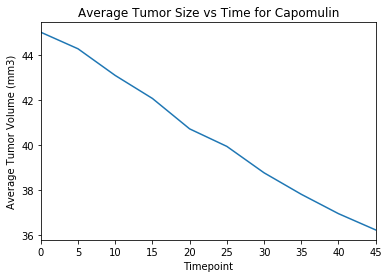

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cond = (df['Drug Regimen'] == 'Capomulin')
df_Capomulin = df[cond]
time_grp_cap = df_Capomulin.groupby(['Timepoint'])
avg_tumor = time_grp_cap['Tumor_Volume'].mean()
tumor_time_df = pd.DataFrame({ 
    "Average Tumor Volume (mm3)": avg_tumor
})
tumor_time_df.plot(kind='line', legend=False)
plt.title("Average Tumor Size vs Time for Capomulin")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

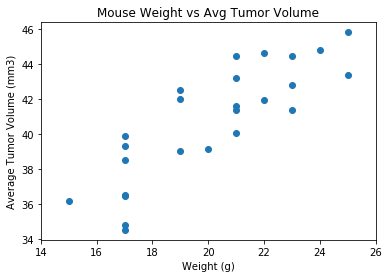

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_grp_cap = df_Capomulin.groupby(['Mouse ID'])
avg_tumor = mouse_grp_cap['Tumor_Volume'].mean()
mouse_weight = mouse_grp_cap['Weight (g)'].mean()
tumor_weight_df = pd.DataFrame({ 
    "Tumor_Volume": avg_tumor,
    "Weight (g)": mouse_weight
})
plt.scatter(tumor_weight_df['Weight (g)'], tumor_weight_df['Tumor_Volume'])
plt.title('Mouse Weight vs Avg Tumor Volume')
plt.xlim(14,26)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

rvalue    = 0.842
r-squared = 0.709


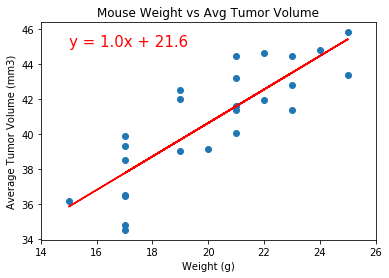

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = tumor_weight_df['Weight (g)']
y_values = tumor_weight_df['Tumor_Volume']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, 45),fontsize=15,color="red")
plt.title('Mouse Weight vs Avg Tumor Volume')
plt.xlim(14,26)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()